In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from matplotlib import animation
import matplotlib.pyplot as plt
import os
import scipy.interpolate as sp

from nu_nu_coll import nu_nu_collisions as coll
from BasicCode import basic_code as trunc
from MakeMovie import movie_support_functions as mv
from CollisionApprox import new_Collision_approx as ca
from N2P import N2P_ratio_not_eq as nprate
from nu_e_coll import new_ve_Collisions1_interp_extrap_0210 as ve

from MakeMovie import MakeMovie as MM

/Users/hannahrasmussen/Work/Most_recent_code/MakeMovie.py:304: RuntimeWarning: divide by zero encountered in true_divide
  n2p_SM = arrs['np_SM'][:(i+1)] / Hub_SM
/Users/hannahrasmussen/Work/Most_recent_code/MakeMovie.py:306: RuntimeWarning: divide by zero encountered in true_divide
  p2n_SM = arrs['pn_SM'][:(i+1)] / Hub_SM


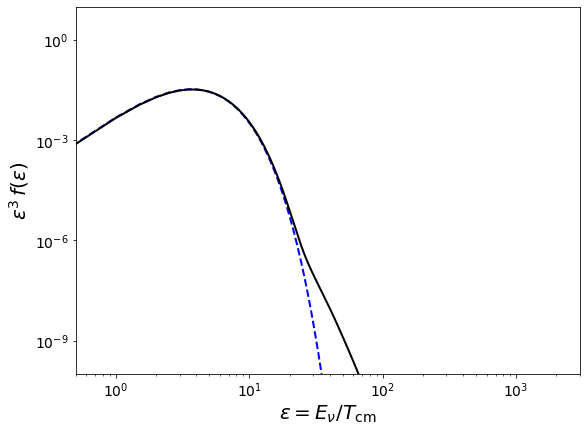

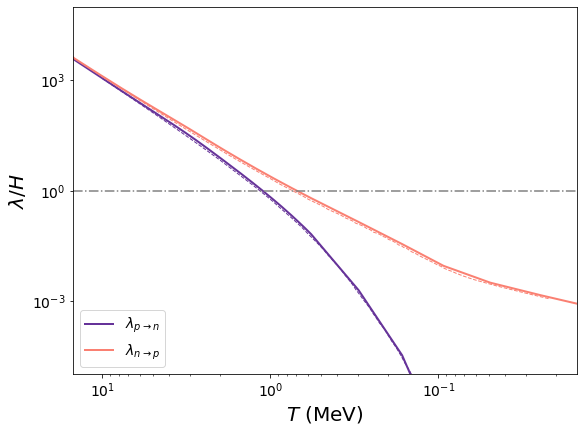

In [2]:
MM.make_only_0and3_video(300,7e-5) #0.030 s decay time

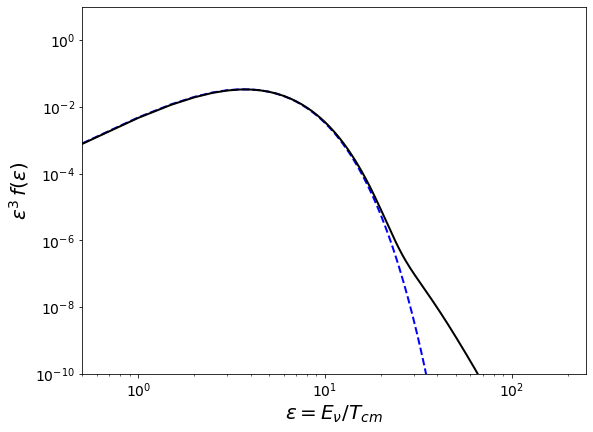

In [3]:
fn_short = "../{}-{:.4}-FullTestNew/{}-{:.4}-FullTestNew".format(300,7e-5,300,7e-5)
arrs_short = np.load(fn_short+'/movie-arrays.npz', allow_pickle=True)
    
eq_a_array = np.load("../eq_arrs/eq_arrs/Luke_a.npy") #scale factor in standard cosmology
eq_T_array = np.load("../eq_arrs/eq_arrs/Luke_T.npy") #temperature in standard cosmology

e_vec = arrs_short['e'][-1]
fe_vec = arrs_short['fe'][-1]
T = arrs_short['T'][-1]
t = arrs_short['t'][-1]
a = arrs_short['a'][-1]
len_e = len(np.where(e_vec > 0)[0])+1

eps = e_vec[:len_e]
fev = fe_vec[:len_e]

e_thermal = eps**3 / (np.exp(eps / a /  (T*(4/11)**(1/3))) +1) / (2 * np.pi**3)
nu = eps**3 * fev / (2 * np.pi**3)

fig0 = plt.figure(figsize=(10,6)) #epsilon vs adjusted occupation fraction
ax0 = plt.axes([0.2,0.12,0.7,0.85])
ax0.loglog(eps, e_thermal, linewidth=2, linestyle='--',color='b')
ax0.loglog(eps, nu, linewidth=2, color='k')
ax0.set_ylim([1e-10,10])
ax0.set_yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1e0])
ax0.set_xlim([0.5,250])
ax0.set_xticks([1e0,1e1,1e2])
ax0.set_xlabel(r"$\epsilon = E_\nu / T_{cm}$",fontsize=20)
ax0.set_ylabel(r"$\epsilon^3 \, f(\epsilon)$",fontsize=20)
ax0.tick_params(axis="x", labelsize=14)
ax0.tick_params(axis="y", labelsize=14)
fig0.savefig("SpectrumShortLived.pdf")

/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


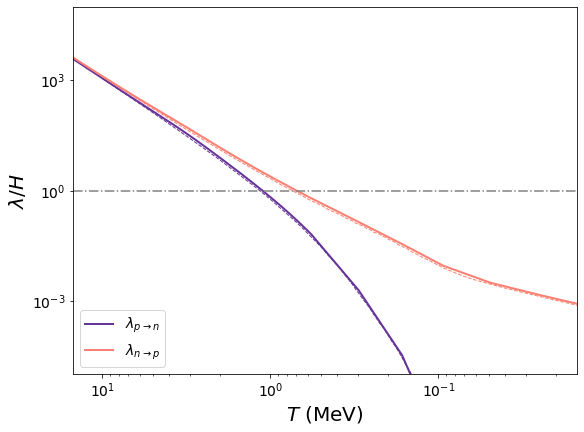

In [4]:
T_vec = arrs_short['T'][:(-1)]
Hub = arrs_short['Hub'][:(-1)]
Hub_SM = arrs_short['Hub_SM'][:(-1)]
n2p = arrs_short['np'][:(-1)] / Hub
n2p_SM = arrs_short['np_SM'][:(-1)]/ Hub_SM
p2n = arrs_short['pn'][:(-1)] / Hub
p2n_SM = arrs_short['pn_SM'][:(-1)]/ Hub_SM
        
fig3 = plt.figure(figsize=(10,6)) #proton to neutron graph
ax3 = plt.axes([0.2,0.12,0.70,0.85])
ax3.loglog(T_vec,p2n,color='rebeccapurple',linewidth=2,label=r"$\lambda_{p \rightarrow n}$")
ax3.loglog(eq_T_array[:(-1)],p2n_SM,color='rebeccapurple',linewidth=1,linestyle='--')
ax3.loglog(T_vec,n2p,color='salmon',linewidth=2,label=r"$\lambda_{n \rightarrow p}$")
ax3.loglog(eq_T_array[:(-1)],n2p_SM,color='salmon',linewidth=1,linestyle='--')  
ax3.axhline(1,color='0.50',linestyle='-.')
ax3.set_xlim(15,0.015)
ax3.set_ylim(1e-5,1e5)
ax3.set_yticks([1e-3,1e0,1e3])
ax3.set_xlabel(r"$T$ (MeV)",fontsize=20)
ax3.set_ylabel(r"$\lambda / H$",fontsize=20)
ax3.tick_params(axis="x", labelsize=14)
ax3.tick_params(axis="y", labelsize=14)
ax3.legend(loc="lower left",fontsize=14)
fig3.savefig("n2pShortLived.pdf")

/Users/hannahrasmussen/Work/Most_recent_code/MakeMovie.py:291: RuntimeWarning: overflow encountered in exp
  e_thermal.set_data(eps, eps**3 / (np.exp(eps / a /  eq_Tcm[i]) +1) / (2 * np.pi**3))
/Users/hannahrasmussen/Work/Most_recent_code/MakeMovie.py:304: RuntimeWarning: divide by zero encountered in true_divide
  n2p_SM = arrs['np_SM'][:(i+1)] / Hub_SM
/Users/hannahrasmussen/Work/Most_recent_code/MakeMovie.py:306: RuntimeWarning: divide by zero encountered in true_divide
  p2n_SM = arrs['pn_SM'][:(i+1)] / Hub_SM


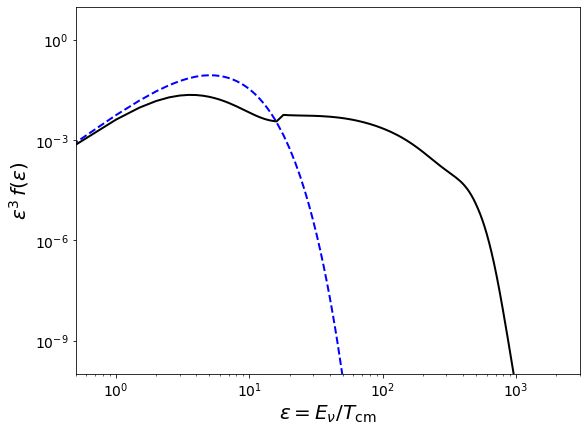

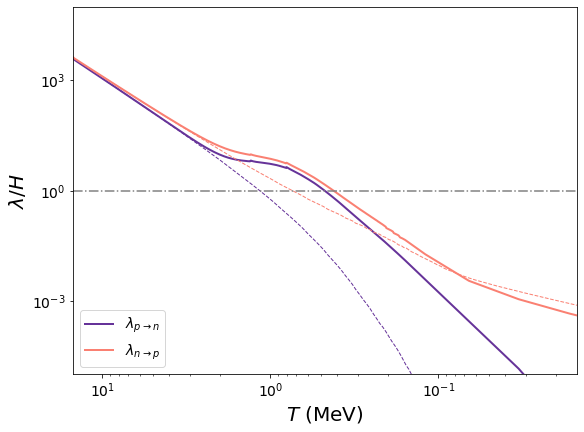

In [8]:
MM.make_only_0and3_video(300,1.28e-5) #0.912 s decay time

/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


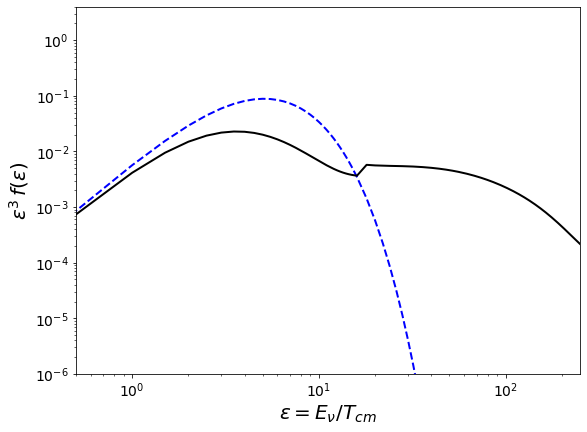

In [5]:
fn_long = "../{}-{:.4}-FullTestNew/{}-{:.4}-FullTestNew".format(300,1.28e-5,300,1.28e-5)
arrs_long = np.load(fn_long+'/movie-arrays.npz', allow_pickle=True)
    
eq_a_array = np.load("../eq_arrs/eq_arrs/Luke_a.npy") #scale factor in standard cosmology
eq_T_array = np.load("../eq_arrs/eq_arrs/Luke_T.npy") #temperature in standard cosmology

e_vec = arrs_long['e'][-1]
fe_vec = arrs_long['fe'][-1]
T = arrs_long['T'][-1]
a = arrs_long['a'][-1]
len_e = len(np.where(e_vec > 0)[0])+1

eps = e_vec[:len_e]
fev = fe_vec[:len_e]

e_thermal = eps**3 / (np.exp(eps / a /  (T*(4/11)**(1/3))) +1) / (2 * np.pi**3)
nu = eps**3 * fev / (2 * np.pi**3)

fig0 = plt.figure(figsize=(10,6)) #epsilon vs adjusted occupation fraction
ax0 = plt.axes([0.2,0.12,0.7,0.85])
ax0.loglog(eps, e_thermal, linewidth=2, linestyle='--',color='b')
ax0.loglog(eps, nu, linewidth=2, color='k')
ax0.set_ylim([1e-6,4])
ax0.set_yticks([1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1])
ax0.set_xlim([0.5,250])
ax0.set_xticks([1e0,1e1,1e2])
ax0.set_xlabel(r"$\epsilon = E_\nu / T_{cm}$",fontsize=20)
ax0.set_ylabel(r"$\epsilon^3 \, f(\epsilon)$",fontsize=20)
ax0.tick_params(axis="x", labelsize=14)
ax0.tick_params(axis="y", labelsize=14)
fig0.savefig("SpectrumLongLived.pdf")

/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


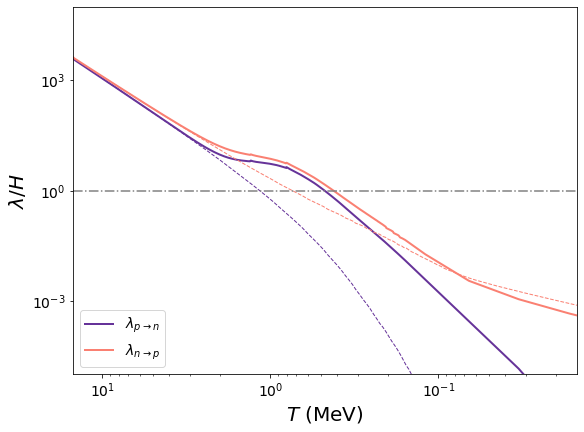

In [7]:
T_vec = arrs_long['T'][:(-1)]
Hub = arrs_long['Hub'][:(-1)]
Hub_SM = arrs_long['Hub_SM'][:(-1)]
n2p = arrs_long['np'][:(-1)] / Hub
n2p_SM = arrs_long['np_SM'] [:(-1)]/ Hub_SM
p2n = arrs_long['pn'][:(-1)] / Hub
p2n_SM = arrs_long['pn_SM'] [:(-1)]/ Hub_SM
        
fig3 = plt.figure(figsize=(10,6)) #proton to neutron graph
ax3 = plt.axes([0.2,0.12,0.70,0.85])
ax3.loglog(T_vec,p2n,color='rebeccapurple',linewidth=2,label=r"$\lambda_{p \rightarrow n}$")
ax3.loglog(eq_T_array[:(-1)],p2n_SM,color='rebeccapurple',linewidth=1,linestyle='--')
ax3.loglog(T_vec,n2p,color='salmon',linewidth=2,label=r"$\lambda_{n \rightarrow p}$")
ax3.loglog(eq_T_array[:(-1)],n2p_SM,color='salmon',linewidth=1,linestyle='--')  
ax3.axhline(1,color='0.50',linestyle='-.')
ax3.set_xlim(15,0.015)
ax3.set_ylim(1e-5,1e5)
ax3.set_yticks([1e-3,1e0,1e3])
ax3.set_xlabel(r"$T$ (MeV)",fontsize=20)
ax3.set_ylabel(r"$\lambda / H$",fontsize=20)
ax3.tick_params(axis="x", labelsize=14)
ax3.tick_params(axis="y", labelsize=14)
ax3.legend(loc="lower left",fontsize=14)
fig3.savefig("n2pLongLived.pdf")